Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
505 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

Top 3 best parameters:
Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: nan

Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation Accuracy: nan

Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Validation Accuracy: nan

Test accuracy: 0.9865591397849462
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        41
           

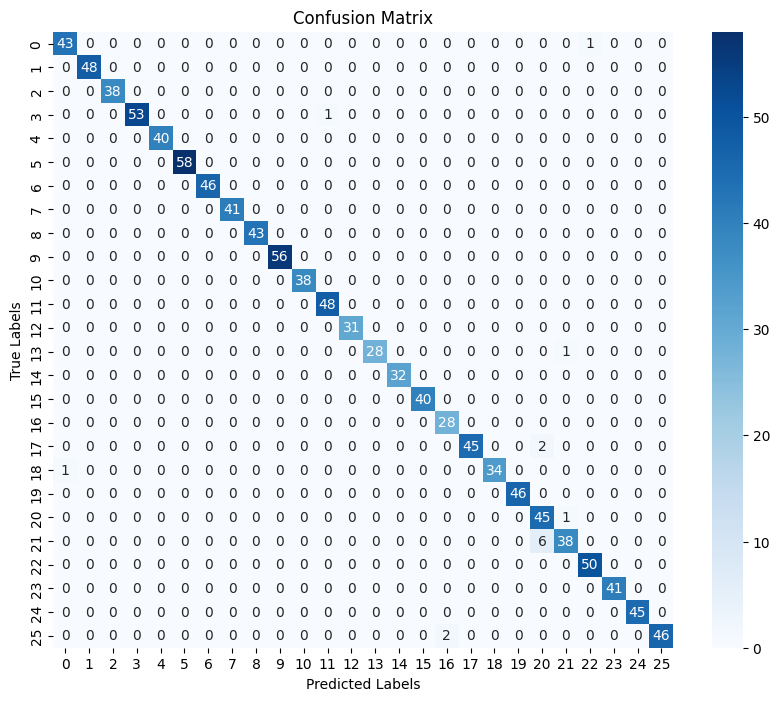

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your provided path
data_path = '../datasets/keypoint_for_train_val.csv'
data = pd.read_csv(data_path, header=None)  # No header in the CSV

# Assign columns for clarity in further operations
columns = ['label'] + [f'feature_{i}' for i in range(data.shape[1] - 1)]
data.columns = columns

# Split the data into features and labels
X = data.drop('label', axis=1).values  # All columns except 'label' are features
y = data['label'].values  # 'label' column as labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Classifier setup
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered for splitting at each leaf node
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the top three best parameters and their corresponding validation accuracies
print("Top 3 best parameters:")
results = grid_search.cv_results_
top_3_idxs = np.argsort(results['mean_test_score'])[-3:][::-1]  # Indices of top 3 best mean_test_score
for idx in top_3_idxs:
    print("Parameters:", results['params'][idx])
    print("Validation Accuracy:", results['mean_test_score'][idx])
    print()

# Test the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

# Classification report
print(classification_report(y_test, y_pred))



# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [6]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your provided path
data_path = '../datasets/keypoint_for_train_val.csv'
data = pd.read_csv(data_path, header=None)  # No header in the CSV

# Assign columns for clarity in further operations
columns = ['label'] + [f'feature_{i}' for i in range(data.shape[1] - 1)]
data.columns = columns

# Split the data into features and labels
X = data.drop('label', axis=1).values  # All columns except 'label' are features
y = data['label'].values  # 'label' column as labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Random Forest Classifier setup
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered for splitting at each leaf node
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)

# Test the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

# Classification report
print(classification_report(y_test, y_pred))


# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
427 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

Best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best validation accuracy: 0.9896953886481302
Test accuracy: 0.9865591397849462
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        56
          10       1.00      1.00      1.00        38
          11       0.98      1.00      0.99        48
          12       1.00      1.00      1.00        31
          13       1.00      0.97    

TypeError: dump() missing 1 required positional argument: 'filename'

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best validation accuracy: 0.9914881062976113
    rank_test_score  mean_test_score  std_test_score  \
1                 1         0.991488        0.002610   
3                 2         0.990592        0.002304   
9                 3         0.989696        0.002778   
0                 4         0.989472        0.002192   
11                5         0.989247        0.003216   

                                               params  
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  
9   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...  
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  
11  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...  


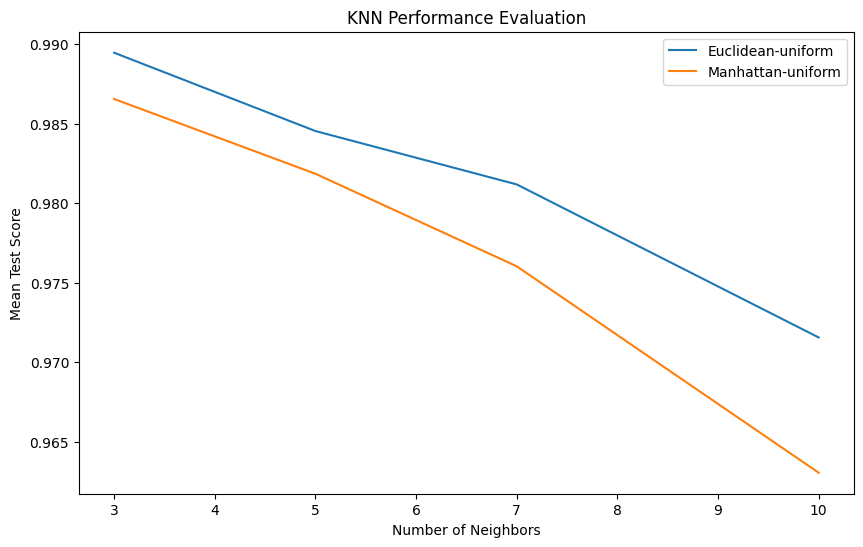

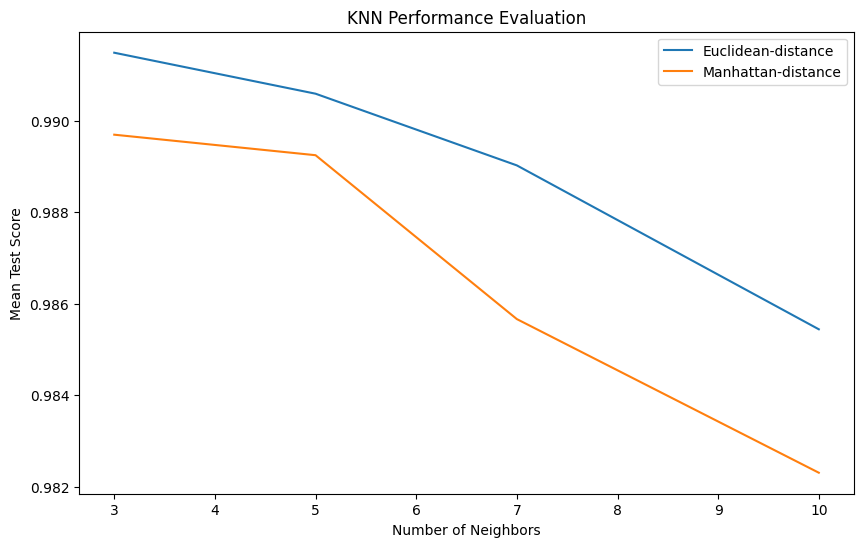

Test accuracy: 0.9946236559139785
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        43
           9       0.98      1.00      0.99        56
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        48
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        32
          15       0.98      1.00      0.99        40
          16       1.00      1.00      1.00    

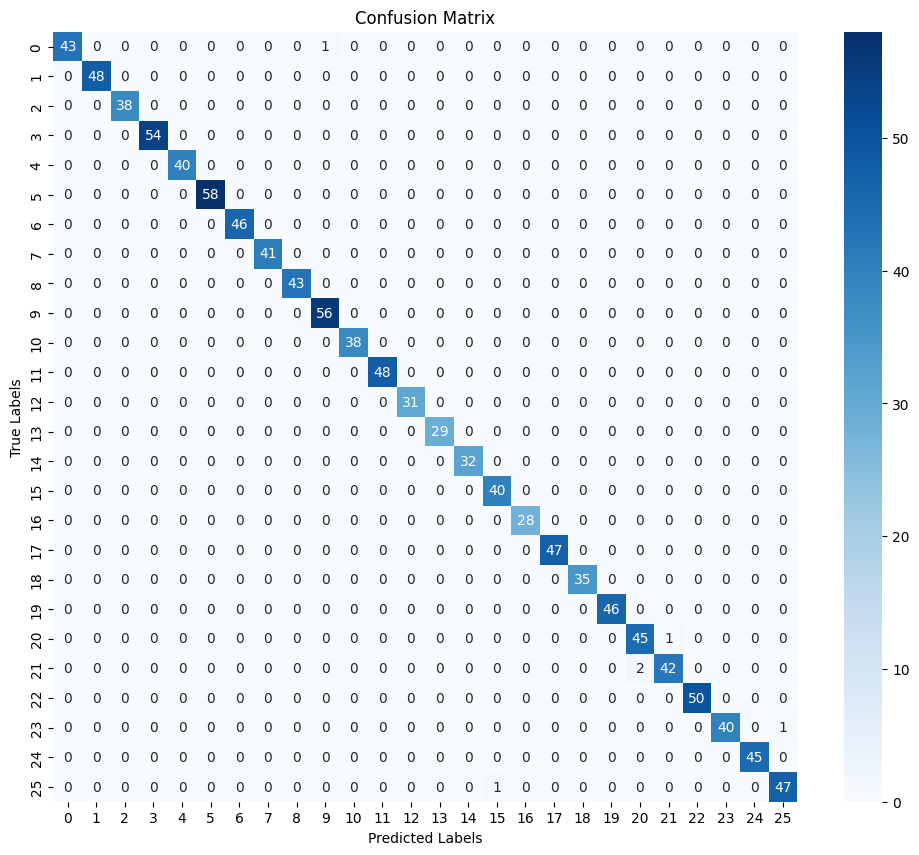

Model saved to ../basemodels/knn_model.joblib
Model loaded from disk
Test accuracy of loaded model: 0.9946


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset from your provided path
data_path = '../datasets/keypoint_for_train_val.csv'
data = pd.read_csv(data_path, header=None)  # No header in the CSV

# Assign columns for clarity in further operations
columns = ['label'] + [f'feature_{i}' for i in range(data.shape[1] - 1)]
data.columns = columns

# Split the data into features and labels
X = data.drop('label', axis=1).values  # All columns except 'label' are features
y = data['label'].values  # 'label' column as labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# KNN Classifier setup
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)

# Create DataFrame from the cv_results
results_df = pd.DataFrame(grid_search.cv_results_)

# Focus on these columns to see the ranks, the mean test scores, and the parameter combinations
interesting_columns = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
print(results_df.loc[:, interesting_columns].sort_values(by='rank_test_score').head())

# It's also insightful to plot the results
import matplotlib.pyplot as plt

# Plotting each combination of 'n_neighbors' for 'euclidean' and 'manhattan' with 'uniform' and 'distance' weights
for scoring in ['uniform', 'distance']:
    plt.figure(figsize=(10, 6))
    subset = results_df[(results_df['param_weights'] == scoring) & (results_df['param_metric'] == 'euclidean')]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'Euclidean-{scoring}')
    subset = results_df[(results_df['param_weights'] == scoring) & (results_df['param_metric'] == 'manhattan')]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'Manhattan-{scoring}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Test Score')
    plt.title('KNN Performance Evaluation')
    plt.legend()
    plt.show()

# Test the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Save the model to disk
model_filename = '../basemodels/knn_model.joblib'
joblib.dump(best_knn, model_filename)
print(f"Model saved to {model_filename}")

# Optionally, load the model from disk
loaded_knn_model = joblib.load(model_filename)
print("Model loaded from disk")

# Test loaded model to confirm it's working as expected
y_pred_loaded = loaded_knn_model.predict(X_test)
print(f"Test accuracy of loaded model: {accuracy_score(y_test, y_pred_loaded):.4f}")
